In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [ ]:
(ds_train,ds_test),ds_info=tfds.load("mnist",split=["train","test"],shuffle_files=True,as_supervised=True,with_info=True)

Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


In [ ]:
ds_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [ ]:
def normalize_img(image,label):
  """Normalizes images uint8 -> float32"""
  return tf.cast(image,tf.float32)/255., label


ds_train = ds_train.map(normalize_img,num_parallel_calls = tf.data.AUTOTUNE)
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(ds_info.splits["train"].num_examples)
ds_train = ds_train.batch(128)
ds_train = ds_train.prefetch(tf.data.AUTOTUNE)



In [ ]:
ds_test = ds_test.map(normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_test = ds_test.batch(128)
ds_test = ds_test.cache()
ds_test = ds_test.prefetch(tf.data.AUTOTUNE)

In [ ]:
for image, label in ds_train:
    # Process the image and label here
    # For example, print the shape of the image and label
    print("Image shape:", image.shape)
    print("Label:", label.numpy())  # Assuming label is a TensorFlow tensor


Image shape: (128, 28, 28, 1)
Label: [8 3 9 9 8 8 0 1 1 3 9 5 6 1 6 4 4 4 0 9 6 1 3 2 6 7 6 8 7 6 5 7 6 9 5 1 6
 2 1 3 6 7 2 4 1 3 0 9 7 6 2 4 8 3 7 2 8 8 5 9 8 1 8 8 8 3 5 5 4 9 3 0 6 8
 3 2 1 8 8 1 2 8 1 4 6 0 7 2 5 5 7 7 0 7 4 9 8 6 7 9 3 8 1 5 5 3 6 1 9 0 4
 4 7 6 2 3 7 3 1 8 9 2 2 0 4 4 2 3]
Image shape: (128, 28, 28, 1)
Label: [2 5 4 9 6 4 3 4 0 7 1 8 7 9 8 7 5 7 1 7 7 2 8 2 7 1 1 4 4 6 2 6 8 1 9 2 3
 1 2 6 6 9 2 1 3 1 1 1 0 1 6 8 2 5 8 4 2 6 2 6 9 9 8 8 2 1 5 3 9 5 1 9 0 1
 6 5 6 0 4 4 2 7 2 4 4 5 0 8 9 4 2 1 3 9 8 3 2 3 7 4 1 3 1 8 6 4 0 9 4 6 2
 5 7 9 1 6 1 2 0 2 3 2 0 5 1 0 4 7]
Image shape: (128, 28, 28, 1)
Label: [9 8 9 9 4 6 6 3 1 3 7 8 4 2 9 5 6 9 7 1 4 6 3 1 3 7 8 7 8 9 5 2 6 1 8 2 6
 9 7 5 8 5 6 3 4 3 4 3 5 9 4 6 1 4 1 6 0 9 1 3 1 4 4 6 5 9 7 2 7 6 2 7 4 5
 6 1 4 3 0 2 6 2 6 7 1 1 4 4 4 3 6 9 7 8 1 1 3 5 1 6 3 1 5 4 2 3 5 1 5 1 1
 9 6 1 0 7 4 5 6 1 3 5 6 2 2 2 6 7]
Image shape: (128, 28, 28, 1)
Label: [4 0 0 4 9 0 1 2 2 4 0 9 2 6 6 6 3 1 6 2 0 7 7 9 4 0 6 8 2 5 3 2 5 4 

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,MaxPool2D,Conv2D,Dense

In [ ]:
tf.random.set_seed(24)

model = Sequential([
    Conv2D(128,3,activation="relu",input_shape=(28,28,1)),
    Conv2D(128,3),
    MaxPool2D(),
    Conv2D(128,3),
    Conv2D(128,3),
    Flatten(),
    Dense(10,activation="softmax")
])

In [ ]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer="adam",
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

history = model.fit(ds_train,
          epochs=20,
          validation_data=ds_test)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


469/469 [==============================] - 11s 19ms/step - loss: 0.0236 - sparse_categorical_accuracy: 0.9943 - val_loss: 0.1258 - val_sparse_categorical_accuracy: 0.9838
Epoch 2/20
469/469 [==============================] - 9s 19ms/step - loss: 0.0178 - sparse_categorical_accuracy: 0.9956 - val_loss: 0.1477 - val_sparse_categorical_accuracy: 0.9814
Epoch 3/20
469/469 [==============================] - 9s 19ms/step - loss: 0.0223 - sparse_categorical_accuracy: 0.9945 - val_loss: 0.1634 - val_sparse_categorical_accuracy: 0.9815
Epoch 4/20
469/469 [==============================] - 9s 19ms/step - loss: 0.0182 - sparse_categorical_accuracy: 0.9956 - val_loss: 0.1212 - val_sparse_categorical_accuracy: 0.9833
Epoch 5/20
469/469 [==============================] - 9s 19ms/step - loss: 0.0202 - sparse_categorical_accuracy: 0.9954 - val_loss: 0.1859 - val_sparse_categorical_accuracy: 0.9801
Epoch 6/20
469/469 [==============================] - 9s 19ms/step - loss: 0.0290 - sparse_categorical_ac

In [ ]:
import random
def get_random_prediction(ds_test) :
    randx = random.randint(0,len(ds_test))
    randy = random.randint(0,128)
    ds_test_iter = iter(ds_test)

    for _ in range(randx):
        _,_ = next(ds_test_iter)
    image,label =next(ds_test_iter)
    y_pred = model.predict(image)
    image = image[randy]
    label = label[randy]
    y_pred = tf.round(tf.argmax(y_pred[randy]))
    return(image,label,y_pred)

In [ ]:
import matplotlib.pyplot as plt

def make_prediction_and_plot(ds_test):
    x,y,y_hat = get_random_prediction(ds_test)
    plt.imshow(x)
    plt.axis(False)
    if y.numpy() == y_hat.numpy():
        plt.title(f"Correct! Predicted: {y.numpy()}", color="green")
    else:
        plt.title(f"False! Predicted: {y_hat.numpy()}, but it is {y.numpy()}", color="red")

4/4 [==============================] - 0s 3ms/step


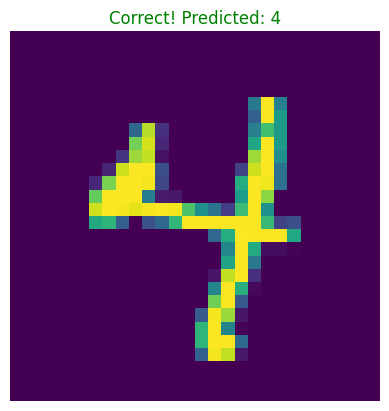

In [ ]:
make_prediction_and_plot(ds_test)

In [ ]:
def visualize_results(history,ylim=False):

    epochs = range(len(history.history["loss"]))

    loss = history.history["loss"]
    val_loss = history.history["val_loss"]

    accuracy = history.history["sparse_categorical_accuracy"]
    val_accuracy = history.history["val_sparse_categorical_accuracy"]

    plt.plot(epochs,loss,label="training loss")
    plt.plot(epochs,val_loss,label="validation loss")
    plt.title("Loss")
    if ylim:
        plt.ylim(0,1)
    plt.xlabel("Epochs")
    plt.legend()

    plt.figure()
    plt.plot(epochs,accuracy,label="training accuracy")
    plt.plot(epochs,val_accuracy,label="validation accuracy")
    plt.title("Accuracy")
    if ylim:
        plt.ylim(0,1)
    plt.xlabel("Epochs")
    plt.legend()

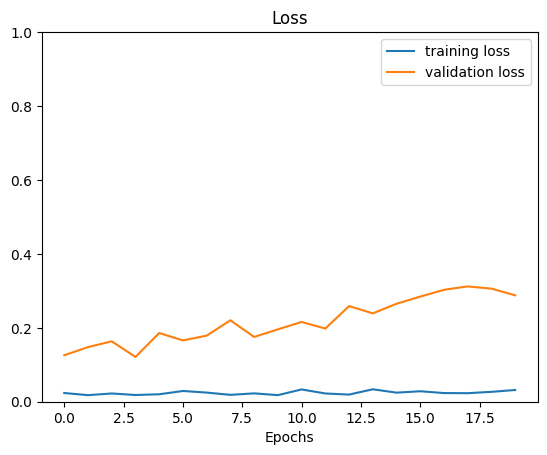

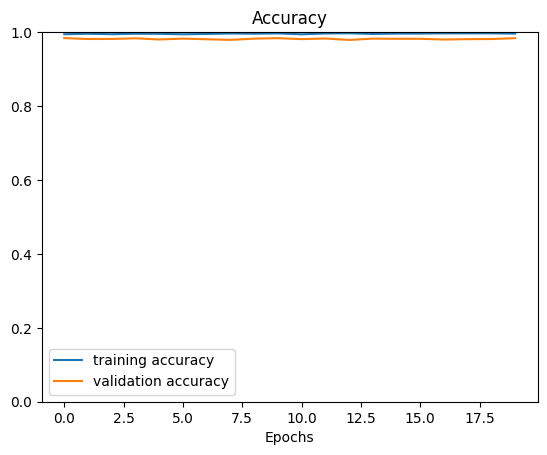

In [ ]:
visualize_results(history,ylim=True)